In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_14_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_14_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 40, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/40
100000/100000 - 5s - loss: 0.4161 - accuracy: 0.8362 - val_loss: 0.3099 - val_accuracy: 0.8642
Epoch 2/40
100000/100000 - 4s - loss: 0.2512 - accuracy: 0.8894 - val_loss: 0.2146 - val_accuracy: 0.9049
Epoch 3/40
100000/100000 - 3s - loss: 0.1977 - accuracy: 0.9102 - val_loss: 0.1896 - val_accuracy: 0.9131
Epoch 4/40
100000/100000 - 3s - loss: 0.1792 - accuracy: 0.9173 - val_loss: 0.1780 - val_accuracy: 0.9197
Epoch 5/40
100000/100000 - 3s - loss: 0.1679 - accuracy: 0.9225 - val_loss: 0.1689 - val_accuracy: 0.9228
Epoch 6/40
100000/100000 - 3s - loss: 0.1610 - accuracy: 0.9261 - val_loss: 0.1600 - val_accuracy: 0.9266
Epoch 7/40
100000/100000 - 3s - loss: 0.1538 - accuracy: 0.9298 - val_loss: 0.1544 - val_accuracy: 0.9293
Epoch 8/40
100000/100000 - 3s - loss: 0.1462 - accuracy: 0.9338 - val_loss: 0.1442 - val_accuracy: 0.9336
Epoch 9/40
100000/100000 - 3s - loss: 0.1340 - accuracy: 0.9388 - val_loss: 0.1345 - val_accuracy: 0.9

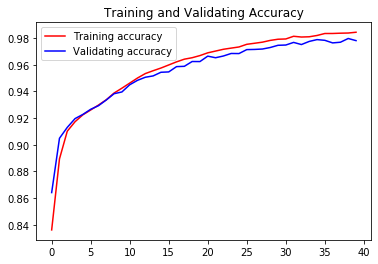

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [7]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0788 - accuracy: 0.9802


[0.048626368880271914, 0.9802001]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_14_2_model.h5')